<a href="https://colab.research.google.com/github/sunitha0423/AI-LAB6-REPCODE/blob/main/plasticdetzeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies
!pip install opencv-python-headless rasterio geemap earthengine-api numpy tensorflow matplotlib scikit-learn albumentations streamlit

# Mount Google Drive (for dataset & model storage)
from google.colab import drive
drive.mount('/content/drive')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.3 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/My Drive/Plastic_Pollution_Dataset"


In [ ]:
import zipfile
import os

zip_path = "/content/drive/My Drive/Plastic_Pollution_Dataset/MARIDA.zip"  # Update with actual file name
extract_path = "/content/drive/My Drive/Plastic_Pollution_Dataset/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [ ]:
import os

dataset_path = "/content/drive/My Drive/Plastic_Pollution_Dataset"  # Update path if needed

# List files and folders inside the dataset directory
print("Dataset contents:", os.listdir(dataset_path))


Dataset contents: ['MARIDA.zip', 'patches', 'shapefiles', 'splits', 'labels_mapping.txt']


In [ ]:
import os

# Define the correct path to patches
patches_path = "/content/drive/My Drive/Plastic_Pollution_Dataset/patches"

# List files inside the patches directory
if os.path.exists(patches_path):
    print("Available image folders in 'patches':", os.listdir(patches_path))
else:
    print("Error: 'patches' folder NOT found.")


Available image folders in 'patches': ['S2_1-12-19_48MYU', 'S2_11-1-19_19QDA', 'S2_11-6-18_16PCC', 'S2_12-1-17_16PCC', 'S2_12-1-17_16PEC', 'S2_12-1-19_16PEC', 'S2_12-12-20_16PCC', 'S2_13-12-18_16PCC', 'S2_14-11-18_48PZC', 'S2_14-12-20_18QYF', 'S2_14-3-20_18QYF', 'S2_14-9-18_16PCC', 'S2_15-10-20_18QYF', 'S2_15-11-20_16PCC', 'S2_15-9-20_18QYF', 'S2_16-2-18_16PEC', 'S2_17-7-16_51PTS', 'S2_18-1-18_48PZC', 'S2_18-5-19_51PTS', 'S2_18-9-20_16PCC', 'S2_18-9-20_16PDC', 'S2_19-3-20_18QYF', 'S2_19-9-18_16PCC', 'S2_19-9-18_16PDC', 'S2_20-10-20_18QYF', 'S2_20-4-18_30VWH', 'S2_21-2-17_16PCC', 'S2_21-2-18_16PCC', 'S2_22-12-20_18QYF', 'S2_22-3-20_18QWF', 'S2_23-1-21_18QYF', 'S2_23-9-20_16PCC', 'S2_24-10-18_16PDC', 'S2_24-11-19_48PZC', 'S2_24-3-20_18QYF', 'S2_24-4-19_36JUN', 'S2_24-8-20_16PCC', 'S2_25-5-19_48MXU', 'S2_26-2-18_16PCC', 'S2_27-1-19_16PCC', 'S2_27-1-19_16QED', 'S2_28-9-20_16PCC', 'S2_28-9-20_16PDC', 'S2_29-11-15_16PEC', 'S2_29-11-20_18QYF', 'S2_29-12-20_18QYF', 'S2_29-8-17_51RVQ', 'S2_3-1-

In [ ]:
sample_folder_name = "S2_12-1-17_16PCC"  # Choose any available folder from the previous step
sample_folder_path = os.path.join(patches_path, sample_folder_name)

# Check files inside this subfolder
if os.path.exists(sample_folder_path):
    print(f"Contents of '{sample_folder_name}':", os.listdir(sample_folder_path))
else:
    print(f"Error: '{sample_folder_name}' folder NOT found.")


Contents of 'S2_12-1-17_16PCC': ['S2_12-1-17_16PCC_0.tif', 'S2_12-1-17_16PCC_0_cl.tif', 'S2_12-1-17_16PCC_0_conf.tif', 'S2_12-1-17_16PCC_1.tif', 'S2_12-1-17_16PCC_10.tif', 'S2_12-1-17_16PCC_10_cl.tif', 'S2_12-1-17_16PCC_10_conf.tif', 'S2_12-1-17_16PCC_11.tif', 'S2_12-1-17_16PCC_11_cl.tif', 'S2_12-1-17_16PCC_11_conf.tif', 'S2_12-1-17_16PCC_12.tif', 'S2_12-1-17_16PCC_12_cl.tif', 'S2_12-1-17_16PCC_12_conf.tif', 'S2_12-1-17_16PCC_13.tif', 'S2_12-1-17_16PCC_13_cl.tif', 'S2_12-1-17_16PCC_13_conf.tif', 'S2_12-1-17_16PCC_14.tif', 'S2_12-1-17_16PCC_14_cl.tif', 'S2_12-1-17_16PCC_14_conf.tif', 'S2_12-1-17_16PCC_15.tif', 'S2_12-1-17_16PCC_15_cl.tif', 'S2_12-1-17_16PCC_15_conf.tif', 'S2_12-1-17_16PCC_16.tif', 'S2_12-1-17_16PCC_16_cl.tif', 'S2_12-1-17_16PCC_16_conf.tif', 'S2_12-1-17_16PCC_17.tif', 'S2_12-1-17_16PCC_17_cl.tif', 'S2_12-1-17_16PCC_17_conf.tif', 'S2_12-1-17_16PCC_18.tif', 'S2_12-1-17_16PCC_18_cl.tif', 'S2_12-1-17_16PCC_18_conf.tif', 'S2_12-1-17_16PCC_19.tif', 'S2_12-1-17_16PCC_19_cl.tif

In [ ]:
!pip install rasterio


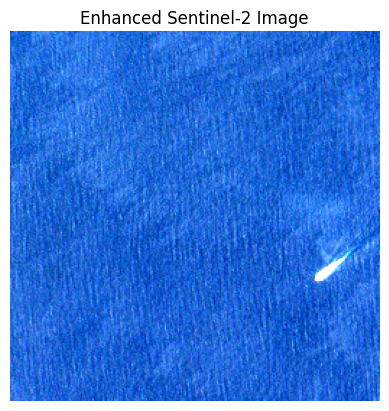

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Normalize function
def normalize(img):
    img = img.astype(np.float32)
    img_min, img_max = np.percentile(img, (2, 98))  # Stretch contrast
    img = (img - img_min) / (img_max - img_min)
    img = np.clip(img, 0, 1)  # Ensure values are between 0 and 1
    return img

# Load and display the image
with rasterio.open(sample_image_path) as src:
    img = src.read([4, 3, 2])  # Use RGB bands
    img = img.transpose((1, 2, 0))  # Format for display
    img = normalize(img)  # Apply contrast stretching

    plt.imshow(img)
    plt.title("Enhanced Sentinel-2 Image")
    plt.axis("off")
    plt.show()


In [ ]:
# Path to labels file
labels_file_path = "/content/drive/My Drive/Plastic_Pollution_Dataset/labels_mapping.txt"

# Read the file
with open(labels_file_path, "r") as file:
    labels = file.readlines()

# Display first 10 lines
for line in labels[:10]:
    print(line.strip())


{"S2_1-12-19_48MYU_0.tif": [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], "S2_1-12-19_48MYU_1.tif": [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], "S2_1-12-19_48MYU_2.tif": [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], "S2_1-12-19_48MYU_3.tif": [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], "S2_11-1-19_19QDA_0.tif": [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], "S2_11-1-19_19QDA_1.tif": [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], "S2_11-1-19_19QDA_2.tif": [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], "S2_11-1-19_19QDA_3.tif": [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "S2_11-1-19_19QDA_4.tif": [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], "S2_11-6-18_16PCC_0.tif": [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], "S2_11-6-18_16PCC_1.tif": [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], "S2_11-6-18_16PCC_10.tif": [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], "S2_11-6-18_16PCC_11.tif": [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0], "S2_11-6-18_16PCC_12.tif": [0, 0, 0, 0, 0, 1, 0,